# Project Description

[Credit Card Approval Prediction](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction)

# Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("drive/My Drive/Applied ML/AML Group Project/data")
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Applied ML/AML Group Project/data


In [3]:
#import the dataset
credit_record = pd.read_csv('credit_record.csv')
application_record = pd.read_csv('application_record.csv')

In [4]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
len(credit_record.ID.unique())

45985

No missing values

In [7]:
print(credit_record.isna().sum())

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [8]:
application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [9]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [10]:
# check missing values
print(application_record.isna().sum())

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


In [11]:
application_record.isna().sum()['OCCUPATION_TYPE'] / len(application_record)

0.30601039317580153

30% are missing, we need to impute it. We can use KNN.

# Preprocessing

## Labeling

Note that we need to label the data fist to do classification. Generally, users with at least 30 days of overdue would be considered risky (Reference from [Equifax](https://www.equifax.com/personal/education/credit-cards/articles/-/learn/when-late-credit-card-payments-post/#:~:text=of%20grace%20period.-,Even%20a%20single%20late%20or%20missed%20payment%20may%20impact%20credit,may%20still%20incur%20late%20fees.)).


Another [resources](https://www.cnn.com/2024/01/11/economy/credit-card-delinquencies/index.html#:~:text=Philly%20Fed%20researchers%20found%20that,more%20(up%20from%201.32%25).) indicates that 3.19% of credit card balances were 30 days late (up from 2.76% the quarter before); that 2.21% of balances were 60+ days delinquent (up from 1.91%); and that 1.52% were in serious delinquency of 90 days or more (up from 1.32%).


Some more [statistics](https://libertystreeteconomics.newyorkfed.org/2023/11/credit-card-delinquencies-continue-to-rise-who-is-missing-payments/)

The target variable we have now is STATUS:

* 0: 1-29 days past due
* 1: 30-59 days past due
* 2: 60-89 days overdue
* 3: 90-119 days overdue
* 4: 120-149 days overdue
* 5: Overdue or bad debts, write-offs for more than 150 days
* C: paid off that month
* X: No loan for the month


Considering the references above, I think it is appropriate to label STATUS 1-5 as risky or default users (1) and the rest as non-risky (0)

In [12]:
credit_record['status_binary'] = credit_record['STATUS'].apply(lambda x: 1 if x in ['1', '2', '3', '4', '5'] else 0)

In [13]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS,status_binary
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0


Note that this dataset consists of the overdue behavior of multiple months. Here I assume that if the user has any kind of overdue behavior during the whole time frame, the user should count as a risky user.

In [14]:
target_df = credit_record.groupby('ID').sum()['status_binary'].reset_index()
target_df['target_status_binary'] = target_df['status_binary'].apply(lambda x: 1 if x > 0 else 0)
target_df

,ID,status_binary,target_status_binary
0,5001711,0,0
1,5001712,0,0
2,5001713,0,0
3,5001714,0,0
4,5001715,0,0
...,...,...,...
45980,5150482,0,0
45981,5150483,0,0
45982,5150484,0,0
45983,5150485,0,0


In [15]:
target_df.groupby('target_status_binary').size()

target_status_binary
0    40635
1     5350
dtype: int64

## Merge Data and Grouping

In [16]:
merged_df = application_record.merge(target_df[['ID', 'target_status_binary']], how ='inner', on='ID')

In [17]:
merged_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target_status_binary
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1


Text(0.5, 1.0, 'Whether User is Risky')

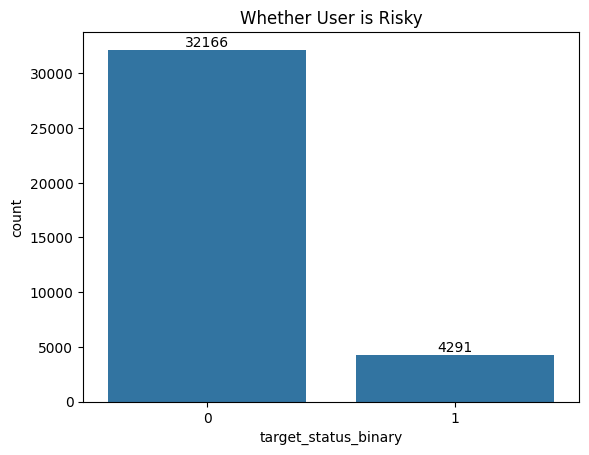

In [18]:
ax = sns.countplot(merged_df, x="target_status_binary")
plt.ticklabel_format(style='plain', axis='y')
ax.bar_label(ax.containers[0])
ax.set_title("Whether User is Risky")

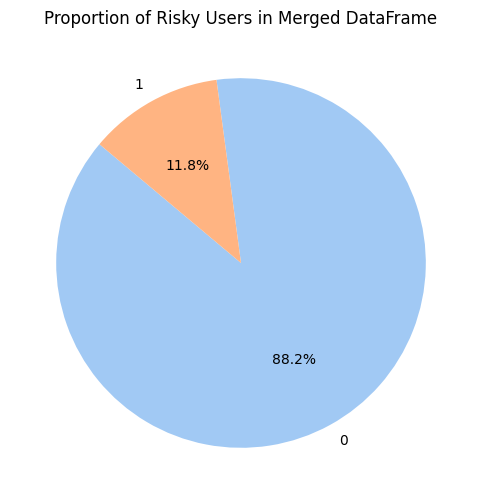

In [19]:
fraud_counts_dev_smote = merged_df['target_status_binary'].value_counts()
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts_dev_smote, labels=fraud_counts_dev_smote.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Risky Users in Merged DataFrame')
plt.show()

## Drop Outliers

From EDA we see there are significant outliers in AMT_INCOME_TOTAL and DAYS_EMPLOYED.



In [20]:
len(merged_df)

36457

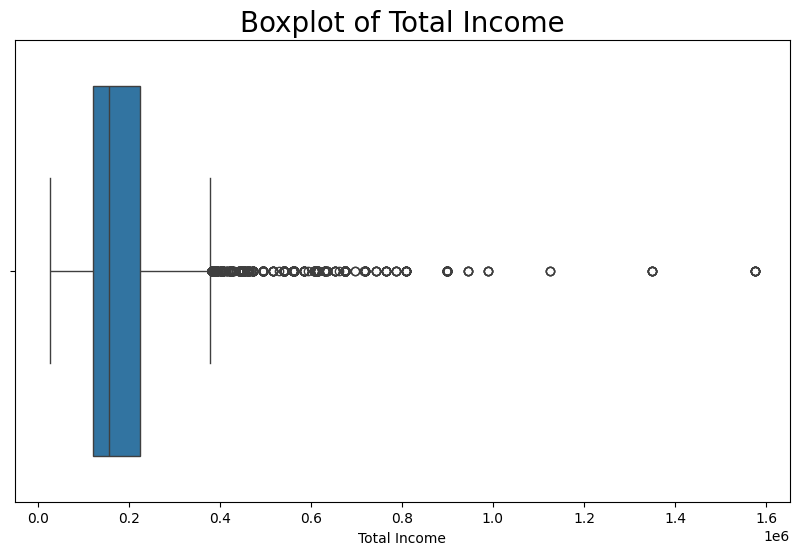

In [21]:
# Boxplot for 'AMT_INCOME_TOTAL' to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['AMT_INCOME_TOTAL'])
plt.title('Boxplot of Total Income',fontsize = 20)
plt.xlabel('Total Income')
plt.show()

# Handling outliers could involve removing them or applying transformations

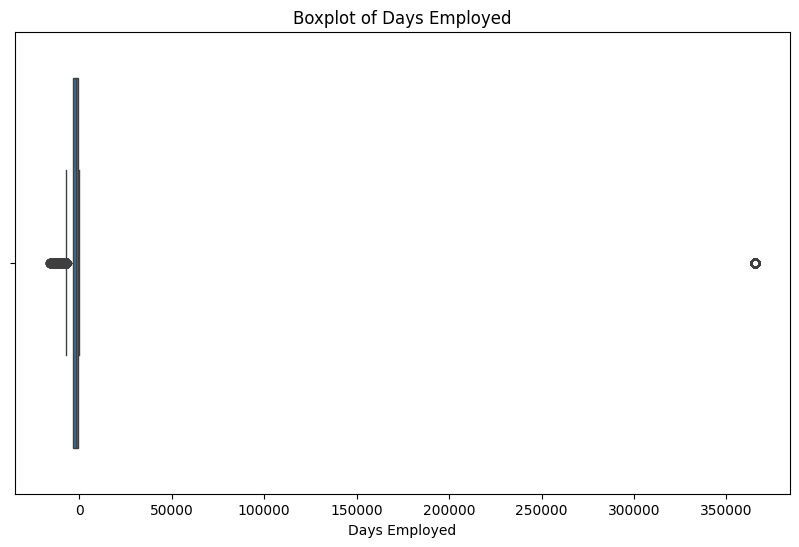

In [22]:
# Boxplot for 'DAYS_EMPLOYED' to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['DAYS_EMPLOYED'])
plt.title('Boxplot of Days Employed')
plt.xlabel('Days Employed')
plt.show()

# Handling outliers could involve removing them or applying transformations

In [23]:
def drop_outliers_iqr(col_name, df):
    Q1 = np.percentile(df[col_name], 25)
    Q3 = np.percentile(df[col_name], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Drop outliers
    cleaned_df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return cleaned_df

In [24]:
merged_df_cleaned = drop_outliers_iqr('AMT_INCOME_TOTAL', merged_df)

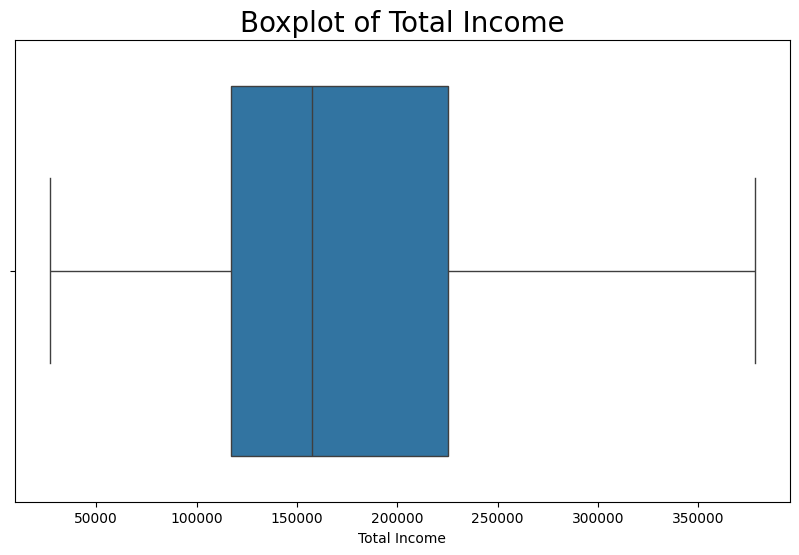

In [25]:
# Boxplot for 'AMT_INCOME_TOTAL' to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df_cleaned['AMT_INCOME_TOTAL'])
plt.title('Boxplot of Total Income',fontsize = 20)
plt.xlabel('Total Income')
plt.show()

# Handling outliers could involve removing them or applying transformations

In [26]:
len(merged_df_cleaned)

34928

Note that being for DAYS_EMPLOYED, if it's positive, it means the person is currently unemployed, so we should create another column indicating this

In [27]:
merged_df_cleaned['unemployed'] = np.where(merged_df_cleaned['DAYS_EMPLOYED']>0 , 1,0)

<ipython-input-27-c67ce6ae90bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['unemployed'] = np.where(merged_df_cleaned['DAYS_EMPLOYED']>0 , 1,0)


In [28]:
merged_df_cleaned.groupby('unemployed').size()

unemployed
0    28878
1     6050
dtype: int64

Now change every positive DAYS_EMPLOYED to 0 to indicate not being employed

In [29]:
# Define the value to be replaced
value_to_replace = merged_df['DAYS_EMPLOYED'].max()

# Replace the value with 0
merged_df_cleaned['DAYS_EMPLOYED'].replace(value_to_replace, 0, inplace=True)

<ipython-input-29-74844a5afa4b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['DAYS_EMPLOYED'].replace(value_to_replace, 0, inplace=True)


Now we see that the outliers have been corrected

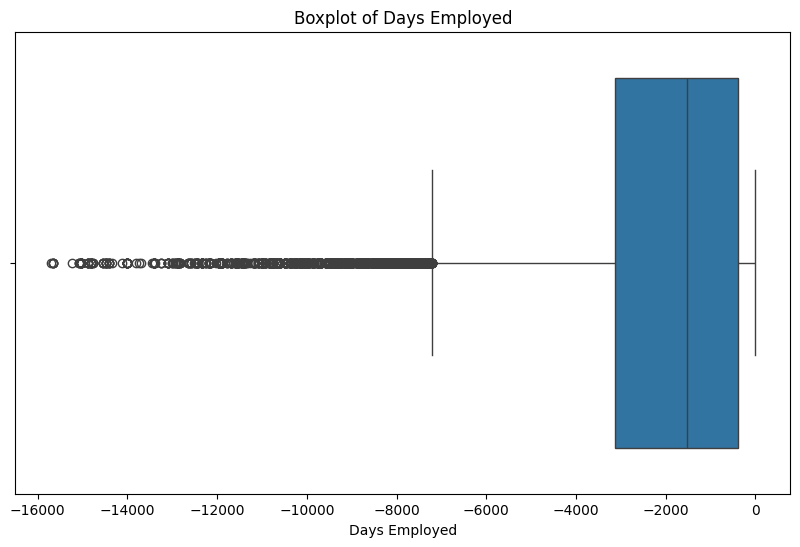

In [30]:
# Boxplot for 'DAYS_EMPLOYED' to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df_cleaned['DAYS_EMPLOYED'])
plt.title('Boxplot of Days Employed')
plt.xlabel('Days Employed')
plt.show()

# Handling outliers could involve removing them or applying transformations

In [31]:
merged_df_cleaned

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target_status_binary,unemployed
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1,0
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1,0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1,0
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1,0


## Encode Categorical Variables

Note that there are too many occupation types. We could put some of the occupations into the same categories to avoid sparsity issue

In [32]:
merged_df_encode = merged_df_cleaned.copy()

In [33]:
merged_df_encode

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target_status_binary,unemployed
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1,0
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1,0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1,0
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1,0


In [34]:
merged_df_cleaned.OCCUPATION_TYPE.unique(), len(merged_df_cleaned.OCCUPATION_TYPE.unique())

(array(['Security staff', 'Sales staff', nan, 'Accountants', 'Laborers',
        'Drivers', 'Core staff', 'Managers', 'High skill tech staff',
        'Cleaning staff', 'Private service staff', 'Cooking staff',
        'Low-skill Laborers', 'Medicine staff', 'Secretaries',
        'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
       dtype=object),
 19)

In [35]:
occupation_categories = {
    'Sales': ['Sales staff', 'Realty agents'],
    'Accounting': ['Accountants'],
    'Driving': ['Drivers'],
    'Management': ['Managers'],
    'Tech': ['High skill tech staff', 'IT staff'],
    'Service': ['Private service staff', 'Waiters/barmen staff', 'Security staff', 'Cleaning staff', 'Core staff', 'Cooking staff', 'Laborers', 'Low-skill Laborers'],
    'Medicine': ['Medicine staff'],
    'Administration': ['Secretaries', 'HR staff']
}

In [36]:
# Function to map occupation to category
def map_to_category(occupation):
    for category, jobs in occupation_categories.items():
        if occupation in jobs:
            return category
    return np.nan  # Return None if occupation not found in any category

# Map occupations to categories and create a new column
merged_df_encode['occupation_category'] = merged_df_encode['OCCUPATION_TYPE'].apply(map_to_category)


In [37]:
merged_df_encode.drop('OCCUPATION_TYPE', axis = 1, inplace = True)


In [38]:
merged_df_encode.occupation_category.unique()

array(['Service', 'Sales', nan, 'Accounting', 'Driving', 'Management',
       'Tech', 'Medicine', 'Administration'], dtype=object)

In [39]:
print(merged_df_encode.isna().sum())

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
CNT_FAM_MEMBERS             0
target_status_binary        0
unemployed                  0
occupation_category     10939
dtype: int64


In [40]:
# every cat_variable besides occupation_category_Administration
cat_variables = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

In [41]:
merged_df_encode = pd.get_dummies(merged_df_encode, columns=cat_variables)
merged_df_encode

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target_status_binary,unemployed,occupation_category,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,0,0,Service,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,0,Sales,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,0,Sales,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False
5,5008810,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,0,Sales,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False
6,5008811,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,0,Sales,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,315000.0,-17348,-2420,1,0,0,0,2.0,1,0,Management,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
36453,5149834,0,157500.0,-12387,-1325,1,0,1,1,2.0,1,0,Medicine,True,False,True,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
36454,5149838,0,157500.0,-12387,-1325,1,0,1,1,2.0,1,0,Medicine,True,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
36455,5150049,0,283500.0,-17958,-655,1,0,0,0,2.0,1,0,Sales,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False


In [42]:
merged_df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34928 entries, 2 to 36456
Data columns (total 40 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 34928 non-null  int64  
 1   CNT_CHILDREN                                       34928 non-null  int64  
 2   AMT_INCOME_TOTAL                                   34928 non-null  float64
 3   DAYS_BIRTH                                         34928 non-null  int64  
 4   DAYS_EMPLOYED                                      34928 non-null  int64  
 5   FLAG_MOBIL                                         34928 non-null  int64  
 6   FLAG_WORK_PHONE                                    34928 non-null  int64  
 7   FLAG_PHONE                                         34928 non-null  int64  
 8   FLAG_EMAIL                                         34928 non-null  int64  
 9   CNT_FAM_MEM

Impute occupation_category manually

In [43]:
merged_df_encode.occupation_category.unique()

array(['Service', 'Sales', nan, 'Accounting', 'Driving', 'Management',
       'Tech', 'Medicine', 'Administration'], dtype=object)

In [44]:
merged_df_encode.occupation_category=merged_df_encode.occupation_category.map({'Service':1,
                                                'Sales': 2,
                                                'Accounting':3,
                                                'Driving': 4,
                                                'Management': 5,
                                                'Tech': 6,
                                                'Medicine': 7,
                                                'Administration': 8})

In [45]:
merged_df_encode.occupation_category.unique()

array([ 1.,  2., nan,  3.,  4.,  5.,  6.,  7.,  8.])

## Imputing Missing Values

In [46]:
print(merged_df_encode.isna().sum())

ID                                                       0
CNT_CHILDREN                                             0
AMT_INCOME_TOTAL                                         0
DAYS_BIRTH                                               0
DAYS_EMPLOYED                                            0
FLAG_MOBIL                                               0
FLAG_WORK_PHONE                                          0
FLAG_PHONE                                               0
FLAG_EMAIL                                               0
CNT_FAM_MEMBERS                                          0
target_status_binary                                     0
unemployed                                               0
occupation_category                                  10939
CODE_GENDER_F                                            0
CODE_GENDER_M                                            0
FLAG_OWN_CAR_N                                           0
FLAG_OWN_CAR_Y                                          

In [47]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_df_encode['occupation_category'] = label_encoder.fit_transform(merged_df_encode['occupation_category'])

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=3)

# Impute missing values
imputed_data = imputer.fit_transform(merged_df_encode)

# Convert back to categorical form
imputed_merged_df_encode = pd.DataFrame(imputed_data, columns=merged_df_encode.columns)

# change it from float to int
imputed_merged_df_encode['occupation_category'] = imputed_merged_df_encode['occupation_category'].astype(int)

In [48]:
imputed_merged_df_encode

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target_status_binary,unemployed,occupation_category,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008806.0,0.0,112500.0,-21474.0,-1134.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5008808.0,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5008809.0,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5008810.0,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5008811.0,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34923,5149828.0,0.0,315000.0,-17348.0,-2420.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34924,5149834.0,0.0,157500.0,-12387.0,-1325.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,6,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34925,5149838.0,0.0,157500.0,-12387.0,-1325.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34926,5150049.0,0.0,283500.0,-17958.0,-655.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
# No missing values here
print(imputed_merged_df_encode.isna().sum())

ID                                                   0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
DAYS_BIRTH                                           0
DAYS_EMPLOYED                                        0
FLAG_MOBIL                                           0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
target_status_binary                                 0
unemployed                                           0
occupation_category                                  0
CODE_GENDER_F                                        0
CODE_GENDER_M                                        0
FLAG_OWN_CAR_N                                       0
FLAG_OWN_CAR_Y                                       0
FLAG_OWN_REALTY_N                                    0
FLAG_OWN_R

In [50]:
imputed_merged_df_encode = pd.get_dummies(imputed_merged_df_encode, columns=['occupation_category'])
imputed_merged_df_encode

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target_status_binary,unemployed,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,occupation_category_0,occupation_category_1,occupation_category_2,occupation_category_3,occupation_category_4,occupation_category_5,occupation_category_6,occupation_category_7,occupation_category_8
0,5008806.0,0.0,112500.0,-21474.0,-1134.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False
1,5008808.0,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,False,False,False
2,5008809.0,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,False,False,False
3,5008810.0,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,False,False,False
4,5008811.0,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34923,5149828.0,0.0,315000.0,-17348.0,-2420.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,False,False,False,True,False,False,False,False
34924,5149834.0,0.0,157500.0,-12387.0,-1325.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,True,False,False
34925,5149838.0,0.0,157500.0,-12387.0,-1325.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,True,False,False
34926,5150049.0,0.0,283500.0,-17958.0,-655.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,False,False,False


In [51]:
# Now we don't have missing values
imputed_merged_df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34928 entries, 0 to 34927
Data columns (total 48 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 34928 non-null  float64
 1   CNT_CHILDREN                                       34928 non-null  float64
 2   AMT_INCOME_TOTAL                                   34928 non-null  float64
 3   DAYS_BIRTH                                         34928 non-null  float64
 4   DAYS_EMPLOYED                                      34928 non-null  float64
 5   FLAG_MOBIL                                         34928 non-null  float64
 6   FLAG_WORK_PHONE                                    34928 non-null  float64
 7   FLAG_PHONE                                         34928 non-null  float64
 8   FLAG_EMAIL                                         34928 non-null  float64
 9   CNT_FA

Here we could have sparsity issue. Need to use models that support sparsity

In [52]:
len(imputed_merged_df_encode)

34928

## SMOTE to treat imbalanced dataset

In [53]:
features = imputed_merged_df_encode.columns[imputed_merged_df_encode.columns != 'target_status_binary']
target = 'target_status_binary'
len(features)

47

In [54]:
X = imputed_merged_df_encode[features]
# target is target_status_binary
y = imputed_merged_df_encode['target_status_binary']

from sklearn.model_selection import train_test_split

# Split data into dev (80%) and test set (20%)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

We have an imbalanced dataset

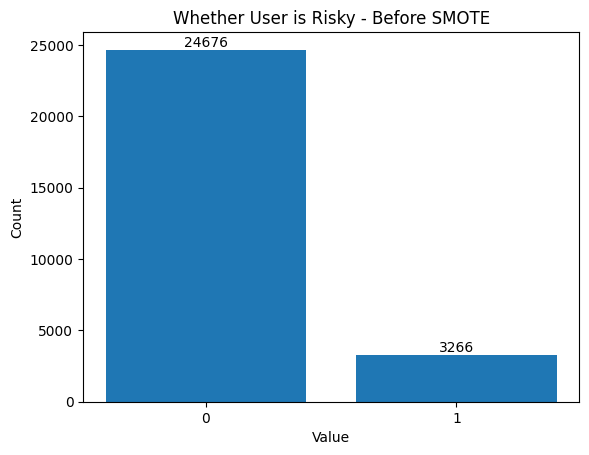

In [65]:
# Count occurrences of 0s and 1s
counts = np.bincount(y_dev)

# Plotting
plt.bar([0, 1], counts, tick_label=['0', '1'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Whether User is Risky - Before SMOTE')
# Adding count values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


In [57]:
# Verify shapes

print("Development set shape:", X_dev.shape, y_dev.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Development set shape: (27942, 47) (27942,)
Test set shape: (6986, 47) (6986,)


In [58]:
# Instantiate SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
# X_smote, y_smote = smote.fit_resample(X, y) # wrong, shouldn't do it on all
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)

print("features set and target set shape:", X_dev_smote.shape, y_dev_smote.shape)

features set and target set shape: (49352, 47) (49352,)


In [59]:
# Convert X_train and X_test to DataFrames
credit_overdue_processed_smote_dev = pd.concat([pd.DataFrame(X_dev_smote, columns=features), pd.Series(y_dev_smote, name=target)], axis=1)
credit_overdue_processed_smote_test = pd.concat([pd.DataFrame(X_test, columns=features), pd.Series(y_test, name=target)], axis=1)

In [60]:
# Convert X_train and X_test to DataFrames
credit_overdue_processed_dev = pd.concat([pd.DataFrame(X_dev, columns=features), pd.Series(y_dev, name=target)], axis=1)
credit_overdue_processed_test = pd.concat([pd.DataFrame(X_test, columns=features), pd.Series(y_test, name=target)], axis=1)

In [61]:
credit_overdue_processed_dev

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,unemployed,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,occupation_category_0,occupation_category_1,occupation_category_2,occupation_category_3,occupation_category_4,occupation_category_5,occupation_category_6,occupation_category_7,occupation_category_8,target_status_binary
29549,5126174.0,0.0,27000.0,-14869.0,-5067.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,False,False,False,True,False,False,False,False,1.0
23809,5117643.0,1.0,135000.0,-11101.0,-96.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False,0.0
26026,5113723.0,0.0,90000.0,-19551.0,-1927.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False,0.0
20919,5091170.0,0.0,81000.0,-9796.0,-292.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False,0.0
9639,5044667.0,0.0,76500.0,-22302.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33709,5149014.0,0.0,225000.0,-17375.0,-3759.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,True,0.0
30170,5132621.0,1.0,292500.0,-10398.0,-742.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False,0.0
31563,5139813.0,0.0,108000.0,-15997.0,-7341.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False,0.0
33605,5148863.0,0.0,135000.0,-10042.0,-2177.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,False,False,True,False,False,False,False,False,0.0


In [62]:
credit_overdue_processed_smote_dev

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,unemployed,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,occupation_category_0,occupation_category_1,occupation_category_2,occupation_category_3,occupation_category_4,occupation_category_5,occupation_category_6,occupation_category_7,occupation_category_8,target_status_binary
0,5.126174e+06,0.00000,27000.000000,-14869.000000,-5067.000000,1.0,1.00000,0.00000,0.00000,2.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.00000,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,False,False,False,False,True,False,False,False,False,1.0
1,5.117643e+06,1.00000,135000.000000,-11101.000000,-96.000000,1.0,1.00000,0.00000,0.00000,3.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.00000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,True,False,False,False,False,False,False,False,False,0.0
2,5.113723e+06,0.00000,90000.000000,-19551.000000,-1927.000000,1.0,0.00000,1.00000,1.00000,2.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.00000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,True,False,False,False,False,False,False,False,False,0.0
3,5.091170e+06,0.00000,81000.000000,-9796.000000,-292.000000,1.0,1.00000,0.00000,0.00000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.00000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,True,False,False,False,False,False,False,False,False,0.0
4,5.044667e+06,0.00000,76500.000000,-22302.000000,0.000000,1.0,0.00000,0.00000,0.00000,2.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,False,False,False,False,False,False,False,False,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49347,5.024389e+06,0.00000,117000.000000,-13494.000000,-1281.000000,1.0,0.00000,0.00000,0.00000,2.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.00000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,False,True,False,False,False,False,False,False,False,1.0
49348,5.023287e+06,0.00000,153873.589613,-22281.437370,-210.826293,1.0,0.00000,0.00000,0.00000,2.00000,0.805869,0.805869,0.194131,1.000000,0.000000,0.805869,0.194131,0.194131,0.805869,0.0,0.0,0.00000,0.0,0.194131,0.0,0.805869,0.000000,0.194131,0.805869,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,False,False,True,False,False,False,False,False,True,1.0
49349,5.024022e+06,1.69826,315000.000000,-12122.000699,-1478.087007,1.0,0.00000,0.69826,0.00000,3.69826,0.000000,0.000000,1.000000,0.301740,0.698260,0.000000,1.000000,0.000000,0.000000

In [63]:
credit_overdue_processed_smote_test

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,unemployed,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,occupation_category_0,occupation_category_1,occupation_category_2,occupation_category_3,occupation_category_4,occupation_category_5,occupation_category_6,occupation_category_7,occupation_category_8,target_status_binary
33626,5148890.0,0.0,108000.0,-16416.0,-1782.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False,0.0
6210,5029474.0,0.0,67500.0,-20371.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,True,0.0
34749,5078882.0,0.0,121500.0,-21366.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,True,1.0
14347,5061488.0,1.0,135000.0,-15948.0,-9359.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,True,0.0
32658,5143335.0,1.0,198000.0,-18530.0,-1596.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28323,5117933.0,0.0,112500.0,-21188.0,-5818.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,True,0.0
1852,5021323.0,0.0,270000.0,-16896.0,-248.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False,0.0
18410,5085697.0,0.0,121500.0,-20602.0,-138.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False,0.0
5524,5028568.0,0.0,315000.0,-15653.0,-5500.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False,0.0


Training set was trated with SMOTE

Text(0.5, 1.0, 'Whether User is Risky - SMOTE')

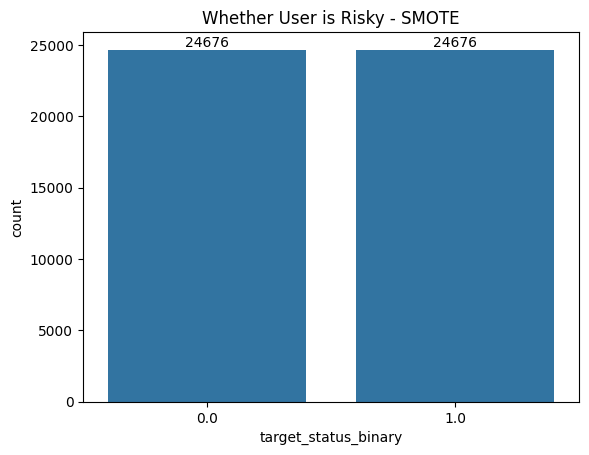

In [64]:
ax = sns.countplot(credit_overdue_processed_smote_dev, x="target_status_binary")
plt.ticklabel_format(style='plain', axis='y')
ax.bar_label(ax.containers[0])
ax.set_title("Whether User is Risky - SMOTE")

Test set was not trated with SMOTE, so it's still imbalanced

Text(0.5, 1.0, 'Whether User is Risky - SMOTE')

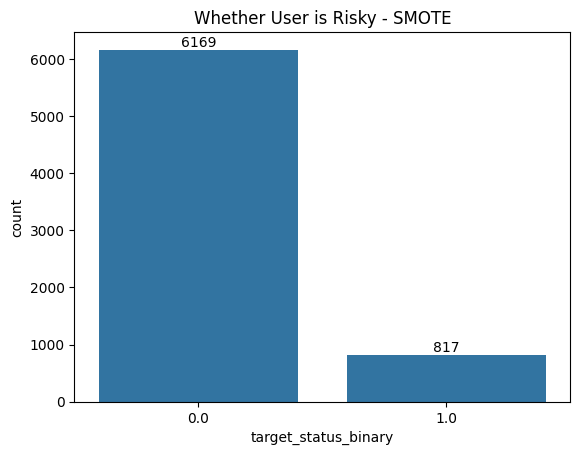

In [ ]:
ax = sns.countplot(credit_overdue_processed_smote_test, x="target_status_binary")
plt.ticklabel_format(style='plain', axis='y')
ax.bar_label(ax.containers[0])
ax.set_title("Whether User is Risky - SMOTE")

save data

In [ ]:
!pwd

/content/drive/MyDrive/Applied ML/AML Group Project/data


In [ ]:
credit_overdue_processed_smote_dev.to_csv("credit_overdue_processed_smote_dev.csv")
credit_overdue_processed_smote_test.to_csv("credit_overdue_processed_smote_test.csv")

In [ ]:
# credit_overdue_processed_dev.to_csv("credit_overdue_processed_dev.csv")
# credit_overdue_processed_test.to_csv("credit_overdue_processed_test.csv")